# Problem Statement
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Spam Email Detection - spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [4]:
df.shape

(5572, 2)

In [5]:
# rename the columns
mail_data=df.rename(columns={'v1':'Category',
                                    'v2':'Message'})

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Label Encoding 

In [8]:

# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1
     

In [9]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [12]:
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5163, 2)

In [16]:
mail_data['Category'].value_counts()

1    4825
0     747
Name: Category, dtype: int64

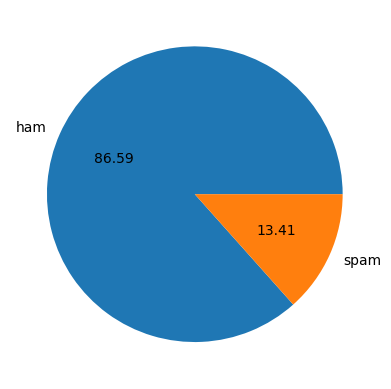

In [17]:
import matplotlib.pyplot as plt
plt.pie(mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanuc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
mail_data['num_characters'] = mail_data['Message'].apply(len)
mail_data.head()

,Category,Message,num_characters
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# num of words
mail_data['num_words'] = mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
mail_data.head()

,Category,Message,num_characters,num_words
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
mail_data[['num_characters','num_words']].describe()

,num_characters,num_words
count,5572.000000,5572.000000
mean,80.031945,18.700826
std,59.622618,13.743217
min,2.000000,1.000000
25%,35.000000,9.000000
50%,61.000000,15.000000
75%,121.000000,27.000000
max,910.000000,220.000000


<Axes: xlabel='num_characters', ylabel='Count'>

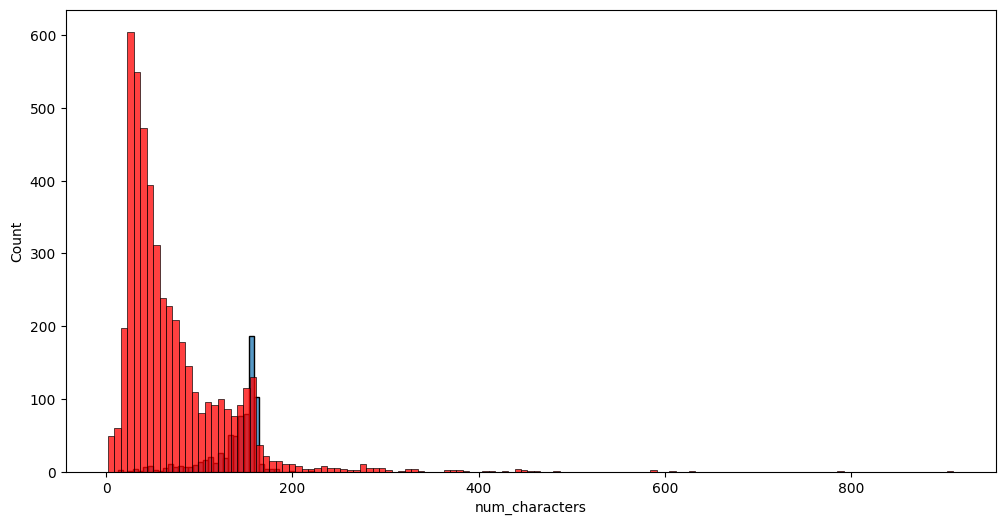

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(mail_data[mail_data['Category'] == 0]['num_characters'])
sns.histplot(mail_data[mail_data['Category'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

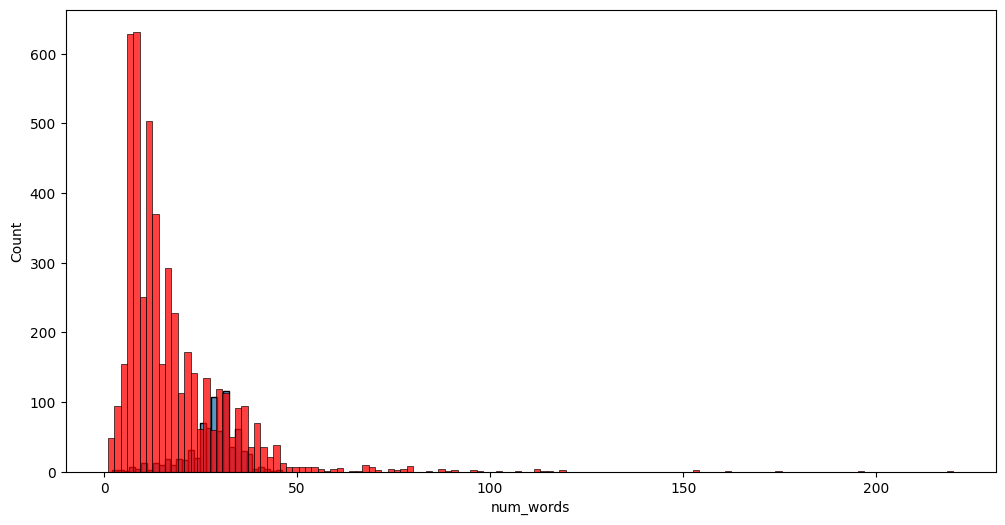

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(mail_data[mail_data['Category'] == 0]['num_words'])
sns.histplot(mail_data[mail_data['Category'] == 1]['num_words'],color='red')

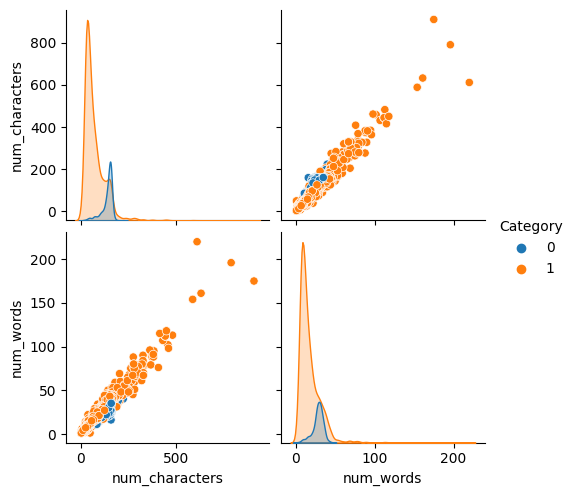

In [24]:
sns.pairplot(mail_data,hue='Category')

C:\Users\tanuc\AppData\Local\Temp\ipykernel_6580\3318647732.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mail_data.corr(),annot=True)


<Axes: >

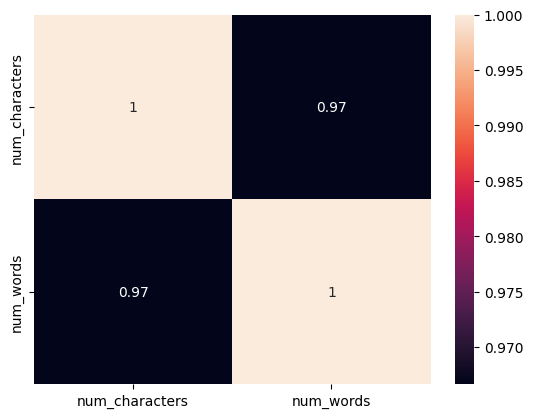

In [25]:
sns.heatmap(mail_data.corr(),annot=True)

In [26]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

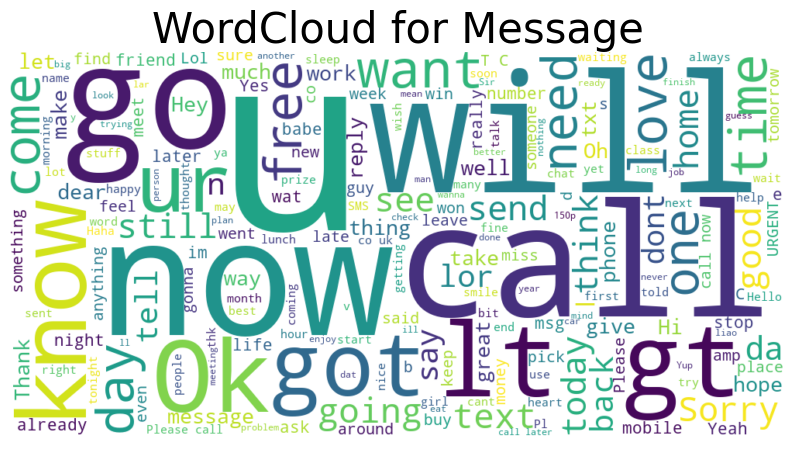

In [27]:
from matplotlib import cm 
text = (' '.join(mail_data['Message'])) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(text)
plt.figure(figsize=(10, 10))
plt.title('WordCloud for Message', fontsize = 30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [28]:
# splitting the data into training data & test data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [30]:
# convert text into feature vector or numeric values
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
# Feature Extraction 

In [32]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [33]:
Y_train

3075    1
1787    1
1614    1
4304    1
3266    1
       ..
789     1
968     1
1667    1
3321    1
1688    1
Name: Category, Length: 4457, dtype: int32

In [34]:
print(X_train_features)     

  (0, 742)	0.32207229533730536
  (0, 3962)	0.2411608243124387
  (0, 4279)	0.3893042361045832
  (0, 6580)	0.20305518394534605
  (0, 3375)	0.32207229533730536
  (0, 2116)	0.38519642807943744
  (0, 3126)	0.4403035234544808
  (0, 3251)	0.258880502955985
  (0, 3369)	0.21816477736422235
  (0, 4497)	0.2910887633154199
  (1, 4045)	0.380431198316959
  (1, 6850)	0.4306015894277422
  (1, 6397)	0.4769136859540388
  (1, 6422)	0.5652509076654626
  (1, 7420)	0.35056971070320353
  (2, 934)	0.4917598465723273
  (2, 2103)	0.42972812260098503
  (2, 3899)	0.40088501350982736
  (2, 2220)	0.413484525934624
  (2, 5806)	0.4917598465723273
  (3, 6121)	0.4903863168693604
  (3, 1595)	0.5927091854194291
  (3, 1838)	0.3708680641487708
  (3, 7430)	0.5202633571003087
  (4, 2523)	0.7419319091456392
  :	:
  (4452, 2116)	0.3092200696489299
  (4453, 1000)	0.6760129013031282
  (4453, 7250)	0.5787739591782677
  (4453, 1758)	0.45610005640082985
  (4454, 3019)	0.42618909997886
  (4454, 2080)	0.3809693742808703
  (4454, 3078

In [35]:
# Training the Model

In [36]:
# Logistic Regression

In [37]:
# training the Logistic Regression model with the training data
model = LogisticRegression()
model.fit(X_train_features, Y_train)


LogisticRegression()

In [38]:
# Evaluating the trained model

In [39]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [40]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9661207089970832


In [41]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
     

In [42]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9623318385650225


In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
MNB = MultinomialNB()
MNB.fit(X_train_features, Y_train)

MultinomialNB()

In [45]:
prediction_on_training_data1 = MNB.predict(X_train_features)
accuracy_on_training_data1 = accuracy_score(Y_train, prediction_on_training_data1)

In [46]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9661207089970832


In [47]:
from sklearn import metrics
pred = MNB.predict(X_test_features)
score_MNB = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score_MNB)

accuracy:   0.971


In [48]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_features, Y_train)


RandomForestClassifier()

In [49]:
pred = RF.predict(X_test_features)
score_RF = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score_RF)

accuracy:   0.982


In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train_features, Y_train)


KNeighborsClassifier()

In [51]:
pred = KNN.predict(X_test_features)
score_KNN = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score_KNN)

accuracy:   0.906


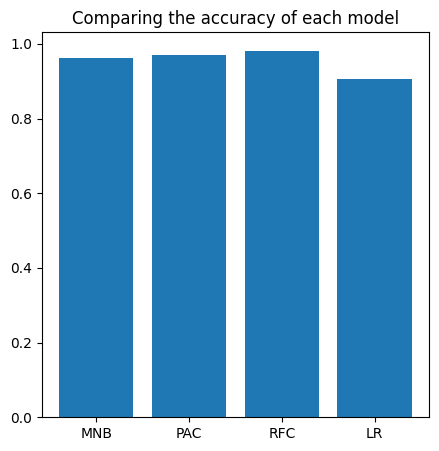

In [52]:
Accuracy = [ accuracy_on_test_data, score_MNB, score_RF, score_KNN]
Methods = ['MNB', 'PAC', 'RFC', 'LR']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(5,5))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.show()

In [53]:
# Building a Predictive System

In [54]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
